<a href="https://colab.research.google.com/github/OsvaldoUfla/KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementação KNN

In [ ]:
%matplotlib inline
import time
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score



#Importação do DataSet Iris

Realizamos a importação da Base de Dados Iris utilizando o Sklearn e adicionamos uma coluna de espécie - que tem o nome definido através de uma decodificação de seu número padrão. Além disso, imprimimos a 5 primeiras linhas de dados

In [ ]:
start_time_total = time.time()  # Inicia a contagem de tempo total

# Carrega o conjunto de dados Iris
iris = datasets.load_iris()

# Converte os dados para um DataFrame do pandas
iris_df = pd.DataFrame(iris.data, columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'])

# Adiciona uma coluna chamada 'species' usando o vetor de destino e decodificando o número da espécie
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Imprime as 5 primeiras linhas do DataFrame
print(iris_df.head())

   sepal_len  sepal_wid  petal_len  petal_wid species
0        5.1        3.5        1.4        0.2  setosa
1        4.9        3.0        1.4        0.2  setosa
2        4.7        3.2        1.3        0.2  setosa
3        4.6        3.1        1.5        0.2  setosa
4        5.0        3.6        1.4        0.2  setosa


In [ ]:
iris_df.size

750

In [ ]:
iris_df.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


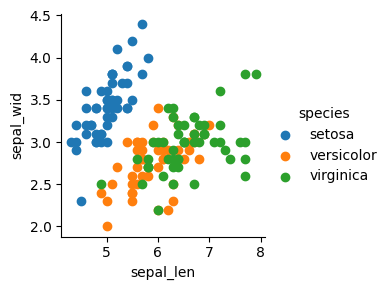

In [ ]:
iris_sns = sns.FacetGrid(iris_df, hue="species")
iris_sns.map(plt.scatter, "sepal_len", "sepal_wid")
iris_sns.add_legend()

#Separação dos dados em conjuntos de treinamento e teste

Dividimos os dados em conjuntos de treinamento e teste para avaliar o desempenho do nosso classificador



In [ ]:
# Divisão do conjunto de dados em treinamento e teste
def dividir_dados_treino_teste(data, taxa_teste):
    # Embaralhar os dados
    np.random.shuffle(data)
    # Calcular o índice para dividir os dados
    indice_divisao = int(len(data) * taxa_teste)
    # Dividir os dados em treinamento e teste
    dados_teste = data[:indice_divisao]
    dados_treinamento = data[indice_divisao:]
    return dados_treinamento, dados_teste

# Definir a taxa de teste
taxa_teste = 0.4  # 40% dos dados serão usados para teste

# Converter o DataFrame pandas em matriz numpy para facilitar a manipulação
dados_iris = iris_df.values

# Dividir os dados em treinamento e teste
dados_treinamento, dados_teste = dividir_dados_treino_teste(dados_iris, taxa_teste)
dados_treinamento2 = dados_treinamento
dados_teste2 = dados_teste

# Verificar o tamanho dos conjuntos de treinamento e teste
print("Número de amostras de treinamento:", len(dados_treinamento))
print("Número de amostras de teste:", len(dados_teste))


Número de amostras de treinamento: 90
Número de amostras de teste: 60


# Criação da Função de Distância Euclidiana

Implementamos uma função que calcula a distância euclidiana entre dois pontos no espaço




In [ ]:
# Calcula a distância euclidiana entre dois pontos
def distancia(x1, x2):
    dist = 0
    for i in range(len(x1)):
        dist += (x1[i] - x2[i])**2
    return dist **0.5

# Implementação do algoritmo KNN

Desenvolvemos o algoritmo KNN (K-Nearest Neighbors) para classificação dos dados

In [ ]:
# Implementação do algoritmo KNN para classificação
def knn_classificacao(dados_treinamento, dados_teste, k):
    previsoes = []
    for amostra_teste in dados_teste:
        distancias = []
        for amostra_treinamento in dados_treinamento:
            dist = distancia(amostra_teste[:-1], amostra_treinamento[:-1])
            distancias.append((amostra_treinamento, dist))
        # Ordenar as distâncias
        distancias.sort(key=lambda x: x[1])
        # Pegar os k vizinhos mais próximos
        vizinhos = distancias[:k]
        # Contar a ocorrência de cada classe entre os vizinhos
        contagem_classes = {}
        for vizinho in vizinhos:
            classe_vizinho = vizinho[0][-1]
            if classe_vizinho in contagem_classes:
                contagem_classes[classe_vizinho] += 1
            else:
                contagem_classes[classe_vizinho] = 1
        # Classificar com base na classe mais frequente entre os vizinhos
        classe_previsao = max(contagem_classes, key=contagem_classes.get)
        previsoes.append(classe_previsao)
    return previsoes

# Implementação e Cálculo da Taxa de Reconhecimento

Avaliamos o desempenho do classificador KNN para diferentes valores de k, calculando e exibindo a taxa de reconhecimento para cada valor de k.


In [ ]:
# Função para calcular a taxa de reconhecimento
def taxa_reconhecimento(previsoes, dados_teste):
    corretos = 0
    for i in range(len(dados_teste)):
        if dados_teste[i][-1] == previsoes[i]:
            corretos += 1
    return (corretos / len(dados_teste)) * 100

# Testar o algoritmo KNN para diferentes valores de k
valores_k = [1, 3, 5, 7]
for k in valores_k:
    # Realizar previsões
    previsoes = knn_classificacao(dados_treinamento, dados_teste, k)
    # Calcular e imprimir a taxa de reconhecimento
    taxa_rec = taxa_reconhecimento(previsoes, dados_teste)
    print(f'Taxa de reconhecimento para k = {k}: {taxa_rec:.2f}%')

Taxa de reconhecimento para k = 1: 96.67%
Taxa de reconhecimento para k = 3: 96.67%
Taxa de reconhecimento para k = 5: 95.00%
Taxa de reconhecimento para k = 7: 96.67%


# Implementação da Matriz de Confusão e Cálculo das Métricas de Avaliação

Implementamos a matriz de confusão para analisar o desempenho do classificador de forma mais detalhada

In [ ]:
# Implementação da matriz de confusão
def matriz_confusao(previsoes, dados_teste):
    classes_reais = [linha[-1] for linha in dados_teste]
    classes_previstas = previsoes
    classes = np.unique(classes_reais)
    matriz = np.zeros((len(classes), len(classes)))
    for i in range(len(classes_reais)):
        classe_real_index = np.where(classes == classes_reais[i])[0][0]
        classe_prevista_index = np.where(classes == classes_previstas[i])[0][0]
        matriz[classe_real_index][classe_prevista_index] += 1
    return matriz

# Calcular a precisão, revocação e acurácia
def calcular_metricas(matriz_confusao):
    precisao = np.diag(matriz_confusao) / np.sum(matriz_confusao, axis=0)
    revocacao = np.diag(matriz_confusao) / np.sum(matriz_confusao, axis=1)
    acuracia = (np.sum(np.diag(matriz_confusao))) / (np.sum(matriz_confusao))
    return precisao, revocacao, acuracia

# Plotagem da Matriz de Confusão, Cálculo e Impressão das Métricas de Avaliação

 Visualização da matriz de confusão para uma melhor compreensão das previsões do modelo/correspondências com as classes reais, além de calcularmos e exibirmos as métricas de avaliação, incluindo precisão por classe, revocação por classe e acurácia média do modelo.

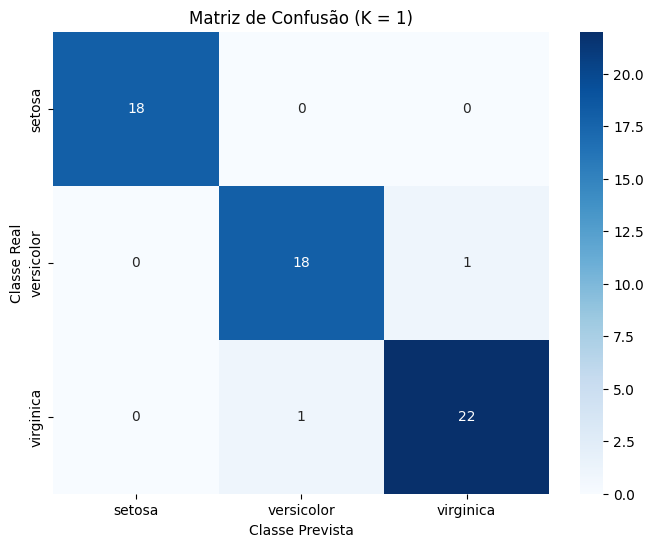

Para k = 1:
  Precisão para setosa: 1.00
  Revocação para setosa: 1.00
  Precisão para versicolor: 0.95
  Revocação para versicolor: 0.95
  Precisão para virginica: 0.96
  Revocação para virginica: 0.96
  Acurácia para k = 1: 0.97




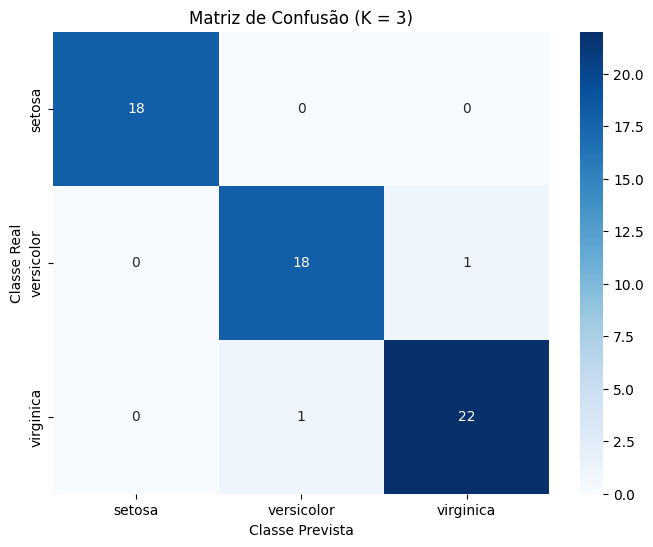

Para k = 3:
  Precisão para setosa: 1.00
  Revocação para setosa: 1.00
  Precisão para versicolor: 0.95
  Revocação para versicolor: 0.95
  Precisão para virginica: 0.96
  Revocação para virginica: 0.96
  Acurácia para k = 3: 0.97




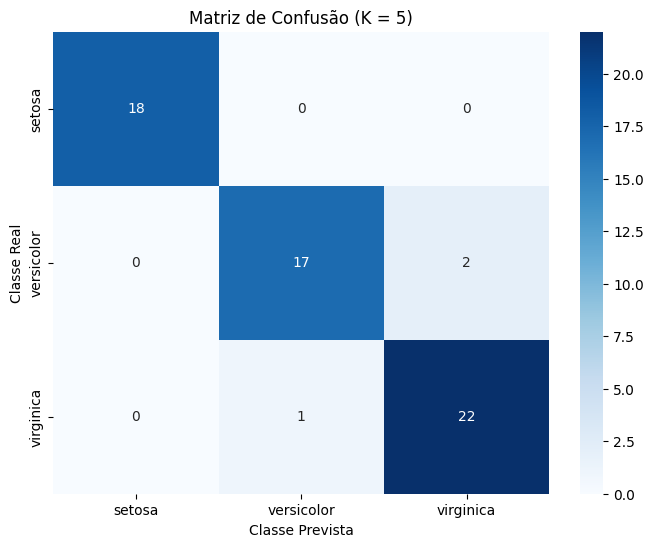

Para k = 5:
  Precisão para setosa: 1.00
  Revocação para setosa: 1.00
  Precisão para versicolor: 0.94
  Revocação para versicolor: 0.89
  Precisão para virginica: 0.92
  Revocação para virginica: 0.96
  Acurácia para k = 5: 0.95




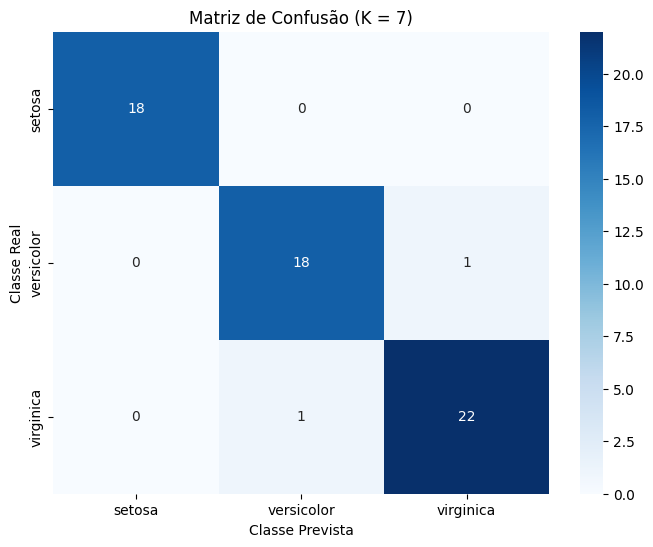

Para k = 7:
  Precisão para setosa: 1.00
  Revocação para setosa: 1.00
  Precisão para versicolor: 0.95
  Revocação para versicolor: 0.95
  Precisão para virginica: 0.96
  Revocação para virginica: 0.96
  Acurácia para k = 7: 0.97


Tempo total de execução: 2.40 segundos



In [ ]:
# Calcular a precisão, revocação e acurácia
def calcular_metricas(matriz_confusao):
    precisao = np.diag(matriz_confusao) / np.sum(matriz_confusao, axis=0)
    revocacao = np.diag(matriz_confusao) / np.sum(matriz_confusao, axis=1)
    acuracia = (np.sum(np.diag(matriz_confusao))) / (np.sum(matriz_confusao))
    return precisao, revocacao, acuracia

# Plotar a matriz de confusão
def plotar_matriz_confusao(matriz_confusao, k):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Classe Prevista')
    plt.ylabel('Classe Real')
    plt.title(f'Matriz de Confusão (K = {k})')
    plt.show()

# Testar o algoritmo KNN para diferentes valores de k
valores_k = [1, 3, 5, 7]
for k in valores_k:
    previsoes = knn_classificacao(dados_treinamento, dados_teste, k)
    taxa_rec = taxa_reconhecimento(previsoes, dados_teste)

    # Calcular a matriz de confusão
    matriz_conf = matriz_confusao(previsoes, dados_teste)
    # Plotar a matriz de confusão
    plotar_matriz_confusao(matriz_conf, k)

    # Calcular e imprimir as métricas de avaliação
    precisao, revocacao, acuracia = calcular_metricas(matriz_conf)
    print(f"Para k = {k}:")
    for i, classe in enumerate(iris.target_names):
        print(f"  Precisão para {classe}: {precisao[i]:.2f}")
        print(f"  Revocação para {classe}: {revocacao[i]:.2f}")
    print(f"  Acurácia para k = {k}: {acuracia:.2f}")
    print("\n")

end_time_total = time.time()  # Termina a contagem de tempo total
total_time_total = end_time_total - start_time_total  # Calcula o tempo total de execução
print(f"Tempo total de execução: {total_time_total:.2f} segundos\n")

# Implementação do KNN utilizando biblioteca pronta






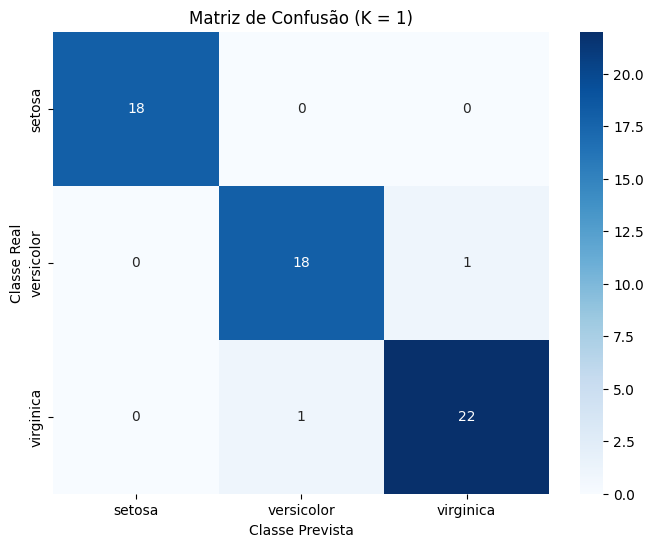

Para k = 1:
  Precisão para setosa: 1.00
  Revocação para setosa: 1.00
  Precisão para versicolor: 0.95
  Revocação para versicolor: 0.95
  Precisão para virginica: 0.96
  Revocação para virginica: 0.96
  Acurácia para k = 1: 0.97
  Taxa de Reconhecimento para k = 1: 96.67%




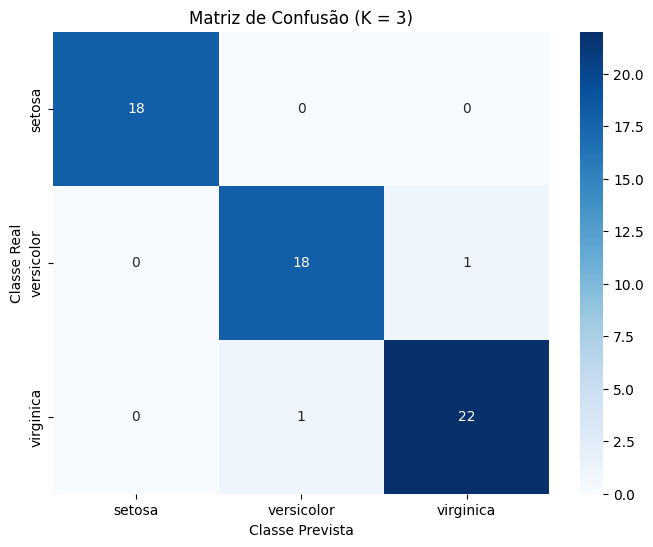

Para k = 3:
  Precisão para setosa: 1.00
  Revocação para setosa: 1.00
  Precisão para versicolor: 0.95
  Revocação para versicolor: 0.95
  Precisão para virginica: 0.96
  Revocação para virginica: 0.96
  Acurácia para k = 3: 0.97
  Taxa de Reconhecimento para k = 3: 96.67%




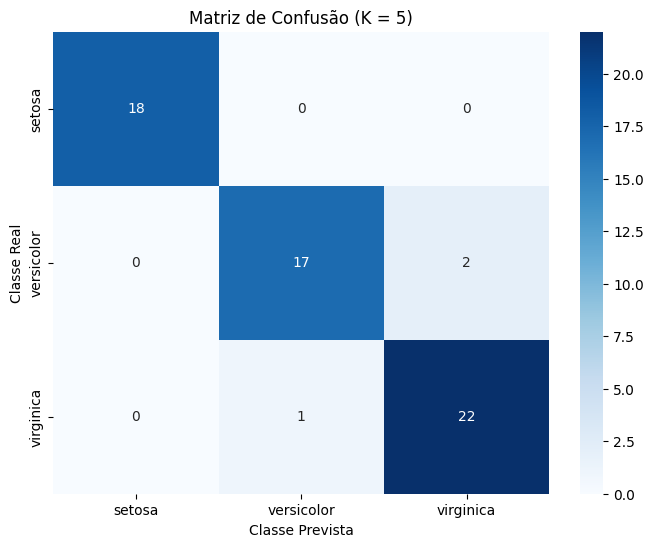

Para k = 5:
  Precisão para setosa: 1.00
  Revocação para setosa: 1.00
  Precisão para versicolor: 0.94
  Revocação para versicolor: 0.89
  Precisão para virginica: 0.92
  Revocação para virginica: 0.96
  Acurácia para k = 5: 0.95
  Taxa de Reconhecimento para k = 5: 95.00%




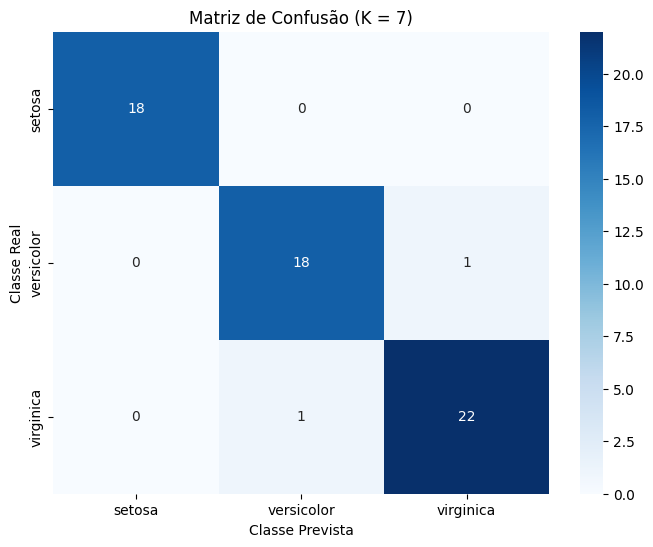

Para k = 7:
  Precisão para setosa: 1.00
  Revocação para setosa: 1.00
  Precisão para versicolor: 0.95
  Revocação para versicolor: 0.95
  Precisão para virginica: 0.96
  Revocação para virginica: 0.96
  Acurácia para k = 7: 0.97
  Taxa de Reconhecimento para k = 7: 96.67%


Tempo total de execução: 1.57 segundos



In [ ]:
start_time_total = time.time()
# Testar o algoritmo KNN para diferentes valores de k
valores_k = [1, 3, 5, 7]
for k in valores_k:
    # Criar e treinar o classificador KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(dados_treinamento2[:, :-1], dados_treinamento2[:, -1])

    # Fazer previsões nos dados de teste
    previsoes = knn.predict(dados_teste2[:, :-1])

    # Calcular a matriz de confusão
    matriz_conf = confusion_matrix(dados_teste2[:, -1], previsoes)

    # Plotar a matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_conf, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Classe Prevista')
    plt.ylabel('Classe Real')
    plt.title(f'Matriz de Confusão (K = {k})')
    plt.show()

    # Calcular e imprimir as métricas de avaliação
    precisao = precision_score(dados_teste2[:, -1], previsoes, average=None)
    revocacao = recall_score(dados_teste2[:, -1], previsoes, average=None)
    acuracia = accuracy_score(dados_teste2[:, -1], previsoes)
    taxa_rec = acuracia * 100  # Taxa de reconhecimento é a mesma que acurácia
    print(f"Para k = {k}:")
    for i, classe in enumerate(iris.target_names):
        print(f"  Precisão para {classe}: {precisao[i]:.2f}")
        print(f"  Revocação para {classe}: {revocacao[i]:.2f}")
    print(f"  Acurácia para k = {k}: {acuracia:.2f}")
    print(f"  Taxa de Reconhecimento para k = {k}: {taxa_rec:.2f}%")
    print("\n")

end_time_total = time.time()  # Termina a contagem de tempo total
total_time_total = end_time_total - start_time_total  # Calcula o tempo total de execução
print(f"Tempo total de execução: {total_time_total:.2f} segundos\n")
